In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

### Read Dataset

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Category Conversion

In [3]:
# Revenue
df['Revenue'] = df['Revenue'].astype(int)

# Weekend
df['Weekend'] = df['Weekend'].astype(int)

### Initial Result

In [4]:
def getInitModel(classifier):
    if(classifier == 'Random Forest Classifier'):
        return RandomForestClassifier(random_state=2000)
    elif(classifier == 'Support Vector Machine'):
        return SVC(random_state=2000)
    elif(classifier == 'MLP Classifier'):
        return MLPClassifier(random_state=2000)

# init features
features = [
            'ProductRelated', 'ProductRelated_Duration',  
            'ExitRates', 'SpecialDay', 'Weekend'
]

df_x = df[features]
df_y = df['Revenue']

model_name = [
    'Random Forest Classifier',
    'Support Vector Machine',
    'MLP Classifier']

for i in range(len(model_name)):

    model = getInitModel(model_name[i])

    train_acc_list = []
    test_acc_list = []

    # 5 Cross Validation - separate to training set and test set
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=888)
    for train_idx, test_idx in kfold.split(df_x, df_y):
        train_x, test_x = df_x.iloc[train_idx], df_x.iloc[test_idx]
        train_y, test_y = df_y.iloc[train_idx], df_y.iloc[test_idx]

        model.fit(train_x, train_y)

        train_pred_y = model.predict(train_x)
        train_acc = metrics.accuracy_score(train_y, train_pred_y)
        test_pred_y = model.predict(test_x)
        test_acc = metrics.accuracy_score(test_y, test_pred_y)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

    print(model_name[i] + ':')
    print('  Average train accuracy: {}'.format(np.mean(train_acc_list)))
    print('  Average validation accuracy: {}\n'.format(np.mean(test_acc_list)))

Random Forest Classifier:
  Average train accuracy: 0.9993917274939171
  Average validation accuracy: 0.8283860502838605

Support Vector Machine:
  Average train accuracy: 0.8452960259529604
  Average validation accuracy: 0.8451743714517438

MLP Classifier:
  Average train accuracy: 0.8313868613138686
  Average validation accuracy: 0.8283049472830495



### Analyze the data

#### Correlation

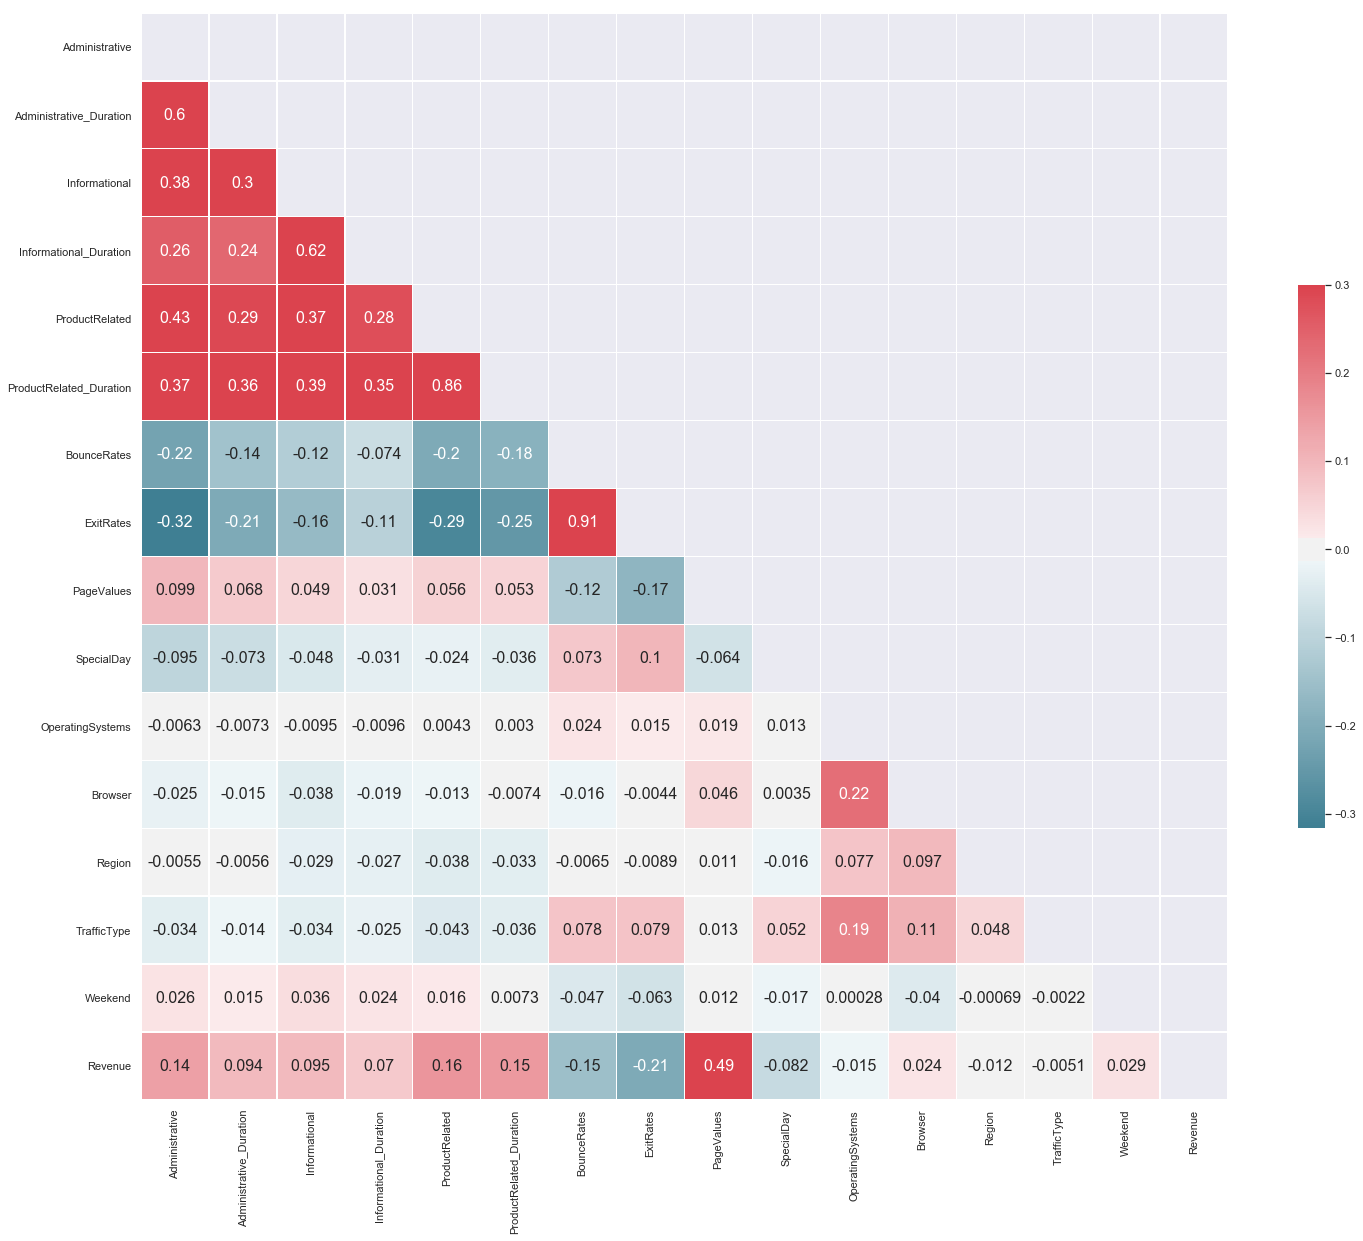

In [5]:
correlation_mat = df.corr()
sns.set(style="dark")

mask = np.triu(np.ones_like(correlation_mat, dtype=np.bool))
f, ax = plt.subplots(figsize=(25, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 16})

#### Features

- Adminisrative、Adminisrative_Duration、Informational、Informational_Duration、ProductRelated、ProductRelated_Duration

Text(0.5, 1.0, 'Informational_Duration')

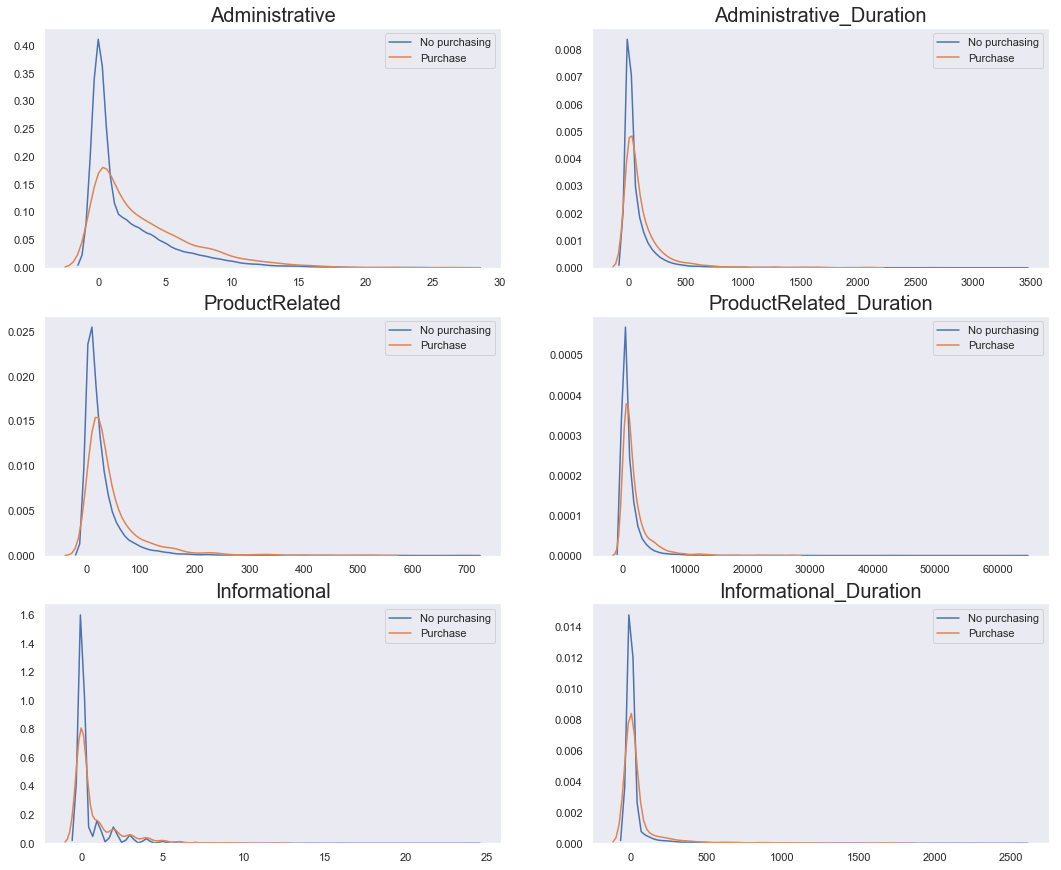

In [6]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2)
fig.set_figwidth(18)
fig.set_figheight(15)
ax1 = sns.kdeplot(df.loc[df.Revenue == 0, 'Administrative'], label='No purchasing', ax=ax1)
ax1 = sns.kdeplot(df.loc[df.Revenue == 1, 'Administrative'], label='Purchase', ax=ax1) 
ax1.legend()
ax1.set_title('Administrative',fontsize = 20)

ax2 = sns.kdeplot(df.loc[df.Revenue == 0, 'Administrative_Duration'], label='No purchasing', ax=ax2)
ax2 = sns.kdeplot(df.loc[df.Revenue == 1, 'Administrative_Duration'], label='Purchase', ax=ax2) 
ax2.legend()
ax2.set_title('Administrative_Duration',fontsize = 20)


ax3 = sns.kdeplot(df.loc[df.Revenue == 0, 'ProductRelated'], label='No purchasing', ax=ax3)
ax3 = sns.kdeplot(df.loc[df.Revenue == 1, 'ProductRelated'], label='Purchase', ax=ax3) 
ax3.legend()
ax3.set_title('ProductRelated',fontsize = 20)

ax4 = sns.kdeplot(df.loc[df.Revenue == 0, 'ProductRelated_Duration'], label='No purchasing', ax=ax4)
ax4 = sns.kdeplot(df.loc[df.Revenue == 1, 'ProductRelated_Duration'], label='Purchase', ax=ax4) 
ax4.legend()
ax4.set_title('ProductRelated_Duration',fontsize = 20)


ax5 = sns.kdeplot(df.loc[df.Revenue == 0, 'Informational'], label='No purchasing', ax=ax5)
ax5 = sns.kdeplot(df.loc[df.Revenue == 1, 'Informational'], label='Purchase', ax=ax5) 
ax5.legend()
ax5.set_title('Informational',fontsize = 20)

ax6 = sns.kdeplot(df.loc[df.Revenue == 0, 'Informational_Duration'], label='No purchasing', ax=ax6)
ax6 = sns.kdeplot(df.loc[df.Revenue == 1, 'Informational_Duration'], label='Purchase', ax=ax6) 
ax6.legend()
ax6.set_title('Informational_Duration',fontsize = 20)

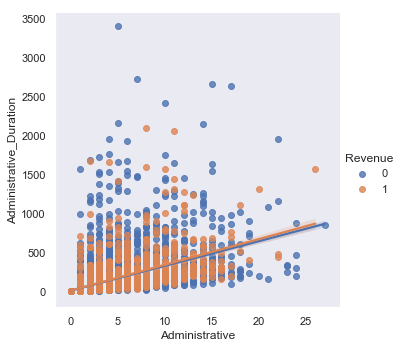

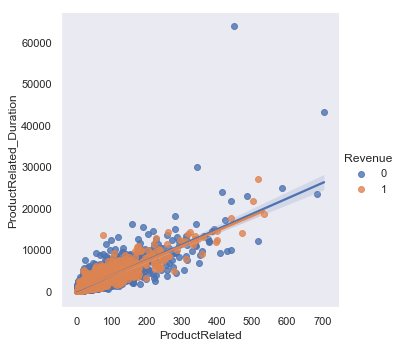

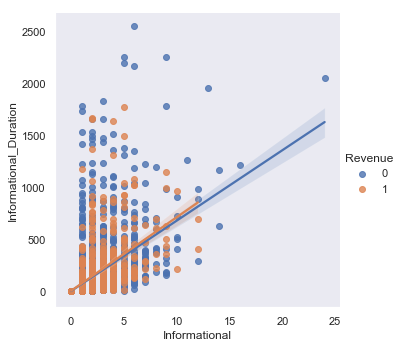

In [7]:
ad = sns.lmplot(x='Administrative', y='Administrative_Duration', hue='Revenue', data=df)
pr = sns.lmplot(x='ProductRelated', y='ProductRelated_Duration', hue='Revenue', data=df)
inf = sns.lmplot(x='Informational', y='Informational_Duration', hue='Revenue', data=df)

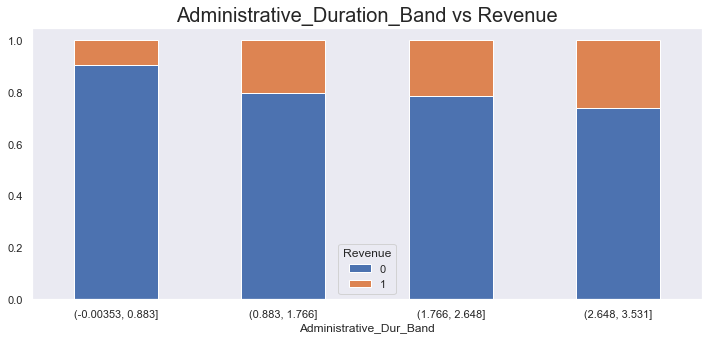

In [8]:
df['Administrative_Duration'] = (df['Administrative_Duration']).map(
    lambda x : np.log10(x) if x > 0 else 0)

df['Administrative_Dur_Band'] = pd.cut(df['Administrative_Duration'], 4)
df[['Administrative_Dur_Band', 'Revenue']].groupby(['Administrative_Dur_Band'], as_index=False).mean().sort_values(by='Revenue', ascending=True)

plot_admin = pd.crosstab(df['Administrative_Dur_Band'], df['Revenue'])
plot_admin.div(plot_admin.sum(1).astype(float), axis = 0).plot(
    kind='bar', stacked=True, figsize=(12, 5))
plt.title('Administrative_Duration_Band vs Revenue', fontsize = 20)
plt.xticks(rotation='horizontal')
plt.show()

df['Administrative_Dur_Band'] = pd.cut(df['Administrative_Duration'], 4, labels=[0, 1, 2, 3])

In [9]:
df['ProductRelated_Band'] = pd.cut(df['ProductRelated'], 5)
df[['ProductRelated_Band', 'Revenue']].groupby(['ProductRelated_Band'], as_index=False).mean().sort_values(by='Revenue', ascending=True)

,ProductRelated_Band,Revenue
4,"(564.0, 705.0]",0.000000
0,"(-0.705, 141.0]",0.148723
1,"(141.0, 282.0]",0.358885
2,"(282.0, 423.0]",0.382979
3,"(423.0, 564.0]",0.454545


In [10]:
df['ProductRelated_Band'] = pd.cut(df['ProductRelated'], 5, labels=[1, 2, 3, 4, 0])
df[['ProductRelated_Band', 'Revenue']].groupby(['ProductRelated_Band'], as_index=False).mean().sort_values(by='Revenue', ascending=True)

,ProductRelated_Band,Revenue
4,0,0.000000
0,1,0.148723
1,2,0.358885
2,3,0.382979
3,4,0.454545


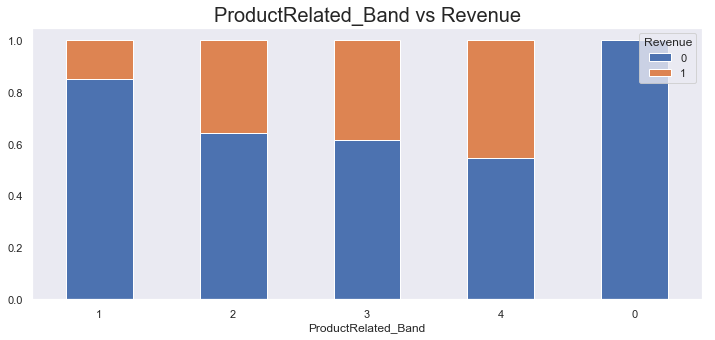

In [11]:
plot_df = pd.crosstab(df['ProductRelated_Band'], df['Revenue'])
plot_df.div(plot_df.sum(1).astype(float), axis = 0).plot(
    kind='bar', stacked=True, figsize=(12, 5))
plt.title('ProductRelated_Band vs Revenue', fontsize = 20)
plt.xticks(rotation='horizontal')
plt.show()

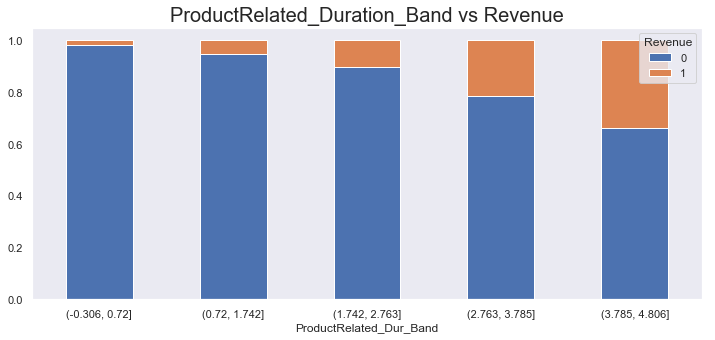

In [12]:
df['ProductRelated_Dur_Band'] = (df['ProductRelated_Duration']).map(
    lambda x : np.log10(x) if x > 0 else 0)

df['ProductRelated_Dur_Band'] = pd.cut(df['ProductRelated_Dur_Band'], 5)

plot_df = pd.crosstab(df['ProductRelated_Dur_Band'], df['Revenue'])
plot_df.div(plot_df.sum(1).astype(float), axis = 0).plot(
    kind='bar', stacked=True, figsize=(12, 5))
plt.title('ProductRelated_Duration_Band vs Revenue', fontsize = 20)
plt.xticks(rotation='horizontal')
plt.show()

In [13]:
le = LabelEncoder()
df['ProductRelated_Dur_Band'] = le.fit_transform(df['ProductRelated_Dur_Band'])

- Total time

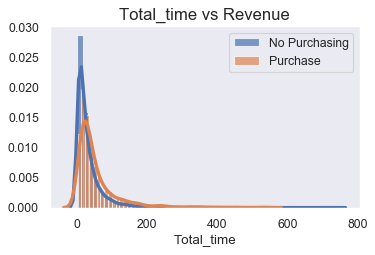

In [14]:
df['Total_time'] = df['Administrative'] + df['Informational'] + df['ProductRelated']

plt.figure(figsize=(5, 3), dpi= 80)

hist_not_buy = df.loc[df['Revenue'] == 0, 'Total_time']
hist_buy = df.loc[df['Revenue'] == 1, 'Total_time']

sns.distplot(hist_not_buy, label="No Purchasing", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(hist_buy, label="Purchase", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})

plt.title('Total_time vs Revenue', fontsize=15)
plt.legend()
plt.show()

- ExitRates * BounceRates

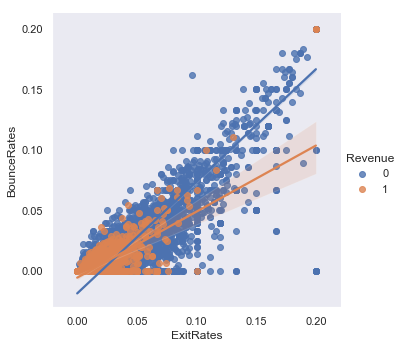

In [15]:
sns.lmplot(x="ExitRates", y="BounceRates",  hue="Revenue", data=df)

In [16]:
df['Bounce*Exit'] = df['BounceRates'] * df['ExitRates']

mms = MinMaxScaler(feature_range=(0, 1))
plot_np = mms.fit_transform(df[['Bounce*Exit']].to_numpy())
plot_df = pd.DataFrame(plot_np, columns=['Bounce*Exit'])

- ExitRates

Text(0.5, 1.0, 'ExitRates')

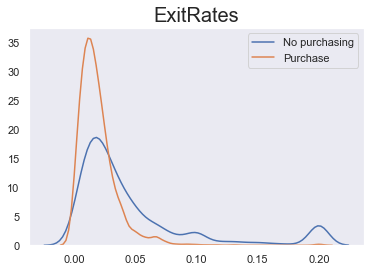

In [17]:
k = sns.kdeplot(df.loc[df.Revenue == 0, 'ExitRates'], label='No purchasing')
k = sns.kdeplot(df.loc[df.Revenue == 1, 'ExitRates'], label='Purchase')
k.legend()
k.set_title('ExitRates',fontsize = 20)

In [18]:
thres = df['ExitRates'].mean()
df['ExitRates_Thres'] = df['ExitRates'].map(
    lambda x : 1 if (x > thres) else 0)

- BounceRates

Text(0.5, 1.0, 'BounceRates')

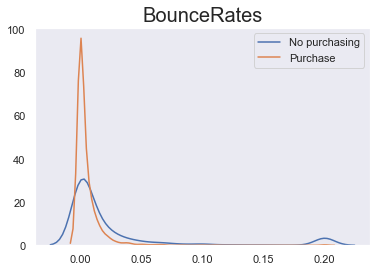

In [19]:
k = sns.kdeplot(df.loc[df.Revenue == 0, 'BounceRates'], label='No purchasing')
k = sns.kdeplot(df.loc[df.Revenue == 1, 'BounceRates'], label='Purchase')
k.legend()
k.set_title('BounceRates',fontsize = 20)

In [20]:
thres = df['BounceRates'].mean()
df['BounceRates_Thres'] = df['BounceRates'].map(
    lambda x : 1 if (x > thres) else 0)

- PageValues

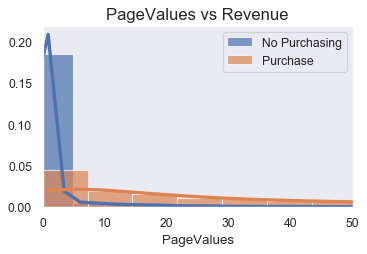

In [21]:
plt.figure(figsize=(5, 3), dpi= 80)

hist_not_buy = df.loc[df['Revenue'] == 0, 'PageValues']
hist_buy = df.loc[df['Revenue'] == 1, 'PageValues']


sns.distplot(
    hist_not_buy, label="No Purchasing", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})

sns.distplot(
    hist_buy, label="Purchase", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})

plt.xlim(0, 50)

# Decoration
plt.title('PageValues vs Revenue', fontsize=15)
plt.legend()
plt.show()

In [22]:
thres = 10
df['PageValues_Thres'] = df['PageValues'].map(
    lambda x : 1 if (x > thres) else 0)

- SpecialDay

Text(0.5, 1.0, 'SpecialDay')

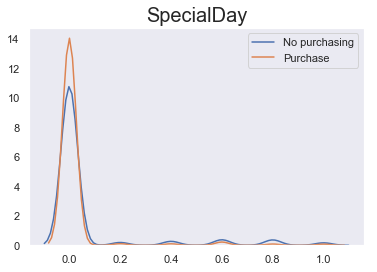

In [23]:
k = sns.kdeplot(df.loc[df.Revenue == 0, 'SpecialDay'], label='No purchasing')
k = sns.kdeplot(df.loc[df.Revenue == 1, 'SpecialDay'], label='Purchase')
k.legend()
k.set_title('SpecialDay',fontsize = 20)

- Month

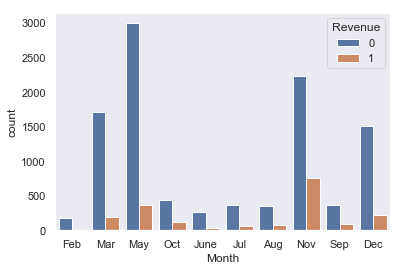

In [24]:
sns.countplot(df['Month'], hue=df['Revenue'])

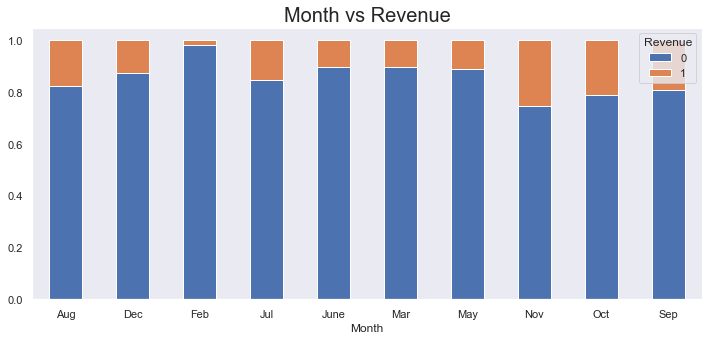

[2, 3, 5, 6, 7, 8, 9, 10, 11, 12]

In [25]:
# Month
plot_df = pd.crosstab(df['Month'], df['Revenue'])
plot_df.div(plot_df.sum(1).astype(float), axis = 0).plot(
    kind='bar', stacked=True, figsize=(12, 5))
plt.title('Month vs Revenue', fontsize = 20)
plt.xticks(rotation='horizontal')
plt.show()

df['Month'] = df['Month'].map(
    {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12 }
).astype(int)

sorted(df['Month'].value_counts().index)

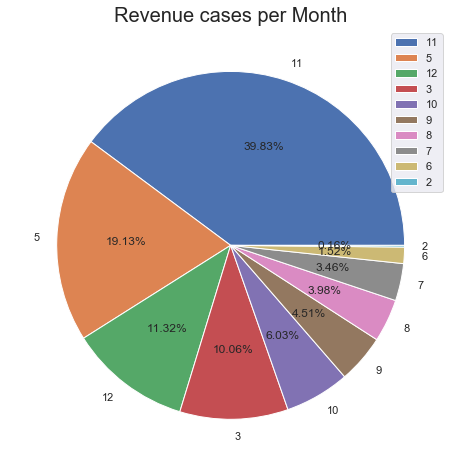

In [26]:
count = (df.loc[df.Revenue == 1, 'Month']).value_counts()
revenue_case = count.tolist()
month = count.index.tolist()

circle = plt.Circle((0, 0), 0.5)
plt.figure(figsize=(20, 8))
plt.pie(revenue_case, labels=month, autopct='%.2f%%')
plt.title('Revenue cases per Month', fontsize=20)
plt.legend()

In [27]:
new_df = pd.get_dummies(df['Month'], prefix='Month')
df = pd.concat([df, new_df], axis=1)

- Operating System

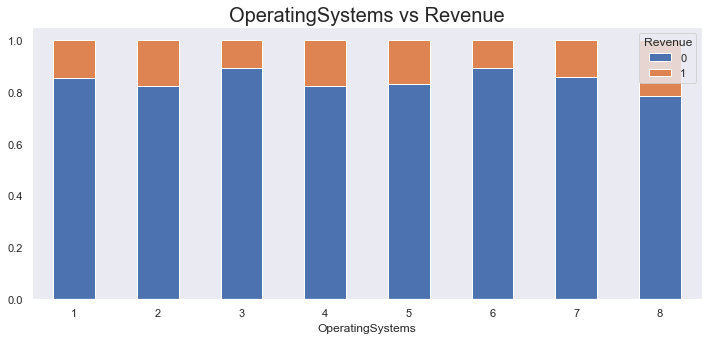

In [28]:
plot_df = pd.crosstab(df['OperatingSystems'], df['Revenue'])
plot_df.div(plot_df.sum(1).astype(float), axis = 0).plot(
    kind='bar', stacked=True, figsize=(12, 5))
plt.title('OperatingSystems vs Revenue', fontsize = 20)
plt.xticks(rotation='horizontal')
plt.show()

- Browser

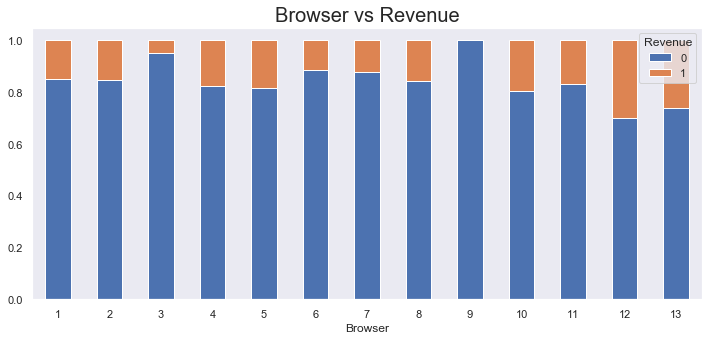

In [29]:
plot_df = pd.crosstab(df['Browser'], df['Revenue'])
plot_df.div(plot_df.sum(1).astype(float), axis = 0).plot(
    kind='bar', stacked=True, figsize=(12, 5))
plt.title('Browser vs Revenue', fontsize = 20)
plt.xticks(rotation='horizontal')
plt.show()

In [30]:
len(df.loc[df.Browser == 9])

1

- Region

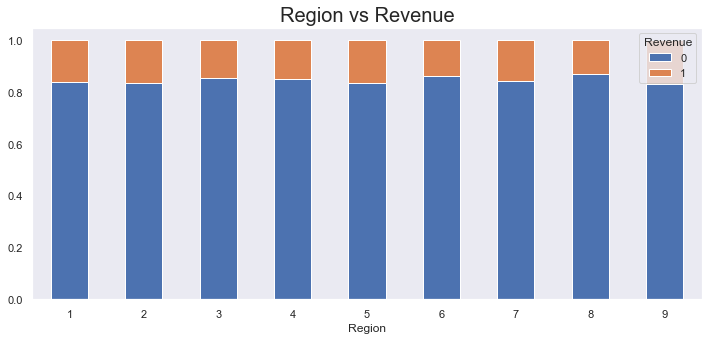

In [31]:
plot_df = pd.crosstab(df['Region'], df['Revenue'])
plot_df.div(plot_df.sum(1).astype(float), axis = 0).plot(
    kind='bar', stacked=True, figsize=(12, 5))
plt.title('Region vs Revenue', fontsize = 20)
plt.xticks(rotation='horizontal')
plt.show()

- Traffic type

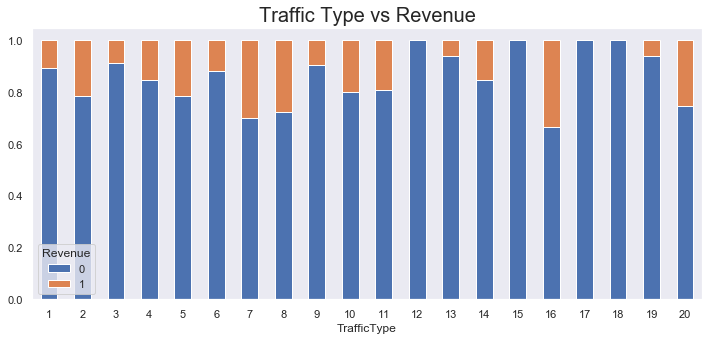

In [32]:
plot_df = pd.crosstab(df['TrafficType'], df['Revenue'])
plot_df.div(plot_df.sum(1).astype(float), axis = 0).plot(
    kind='bar', stacked=True, figsize=(12, 5))
plt.title('Traffic Type vs Revenue', fontsize = 20)
plt.xticks(rotation='horizontal')
plt.show()

In [33]:
df['Traffic_noRevenue'] = df['TrafficType'].map(
    lambda x : 1 if (x == 12 or x == 15 or x == 17 or x == 18) else 0)

df['Traffic_noRevenue'].value_counts()

0    12280
1       50
Name: Traffic_noRevenue, dtype: int64

- VisitorType

,VisitorType,Revenue
0,New_Visitor,0.249
1,Other,0.188
2,Returning_Visitor,0.139


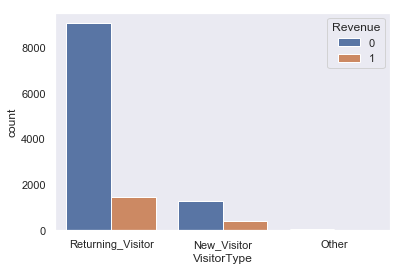

In [34]:
sns.countplot(df['VisitorType'], hue=df['Revenue'])
display(df[["VisitorType", "Revenue"]].groupby(['VisitorType'], as_index=False).mean().round(3))

In [35]:
visit_dum = pd.get_dummies(df['VisitorType'])
df[['New_Visitor', 'Other', 'Returning_Visitor']] = pd.DataFrame(visit_dum)
df[['New_Visitor', 'Other', 'Returning_Visitor']].head()

,New_Visitor,Other,Returning_Visitor
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


- Weekend

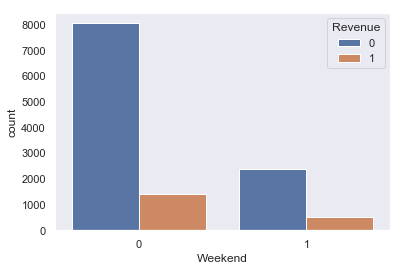

In [36]:
sns.countplot(df['Weekend'], hue=df['Revenue'])

### Train and Validation

#### Final Model without tuning hyperparameters

In [37]:
def getFinalModel(classifier):
    
    if(classifier == 'Random Forest Classifier'):
        return RandomForestClassifier(n_estimators=250,
                                #         max_depth=10,
                                #         min_samples_split=2,
                                        criterion='entropy',
                                            #         min_weight_fraction_leaf=0.01,
                                        random_state=2000)
    
    elif(classifier == 'Support Vector Machine'):
        return SVC(C=70, kernel='rbf', gamma=0.4, random_state=2000)
    elif(classifier == 'MLP Classifier'):
        return MLPClassifier(max_iter=500, random_state=2000)

# final features
features = [
            'PageValues_Thres', 'ProductRelated_Band', 'ProductRelated_Dur_Band',  
            'Administrative', 'Administrative_Dur_Band', 
            'Bounce*Exit', 'BounceRates_Thres', 'ExitRates_Thres',
            'Month_2', 'Month_11',
            'Traffic_noRevenue',
            'Returning_Visitor', 'New_Visitor',
            'Weekend', 'SpecialDay'
]

df_x = df[features]
df_y = df['Revenue']

model_name = [
    'Random Forest Classifier',
    'Support Vector Machine',
    'MLP Classifier']

for i in range(len(model_name)):

    model = getFinalModel(model_name[i])

    train_acc_list = []
    test_acc_list = []

    # 5 Cross Validation - separate to training set and test set
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=888)
    for train_idx, test_idx in kfold.split(df_x, df_y):
        train_x, test_x = df_x.iloc[train_idx], df_x.iloc[test_idx]
        train_y, test_y = df_y.iloc[train_idx], df_y.iloc[test_idx]

        model.fit(train_x, train_y)

        train_pred_y = model.predict(train_x)
        train_acc = metrics.accuracy_score(train_y, train_pred_y)
        test_pred_y = model.predict(test_x)
        test_acc = metrics.accuracy_score(test_y, test_pred_y)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

    print(model_name[i] + ':')
    print('  Average train accuracy: {}'.format(np.mean(train_acc_list)))
    print('  Average validation accuracy: {}\n'.format(np.mean(test_acc_list)))

Random Forest Classifier:
  Average train accuracy: 0.9715328467153285
  Average validation accuracy: 0.8820762368207623

Support Vector Machine:
  Average train accuracy: 0.9212895377128953
  Average validation accuracy: 0.8804541768045417

MLP Classifier:
  Average train accuracy: 0.9011354420113543
  Average validation accuracy: 0.897566909975669

